In [19]:
import pandas as pd 
import seaborn as sns
import numpy as np
import sklearn


In [5]:
raw_data = pd.read_csv("Documents/DiabetesDataProj/diabetes.csv")
print(raw_data)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1    

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

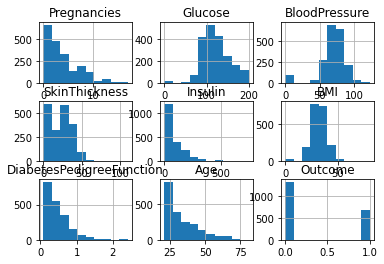

In [6]:
raw_data.hist()

In [7]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [57]:
#cleaning (108 mg/dl is a healthy glucose reading)
clean_data = raw_data[raw_data['Glucose'] > 108]
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
...,...,...,...,...,...,...,...,...,...
1989,4,110,66,0,0,31.9,0.471,29,0
1990,3,111,90,12,78,28.4,0.495,29,0
1992,6,134,70,23,130,35.4,0.542,29,1
1996,8,179,72,42,130,32.7,0.719,36,1


In [58]:
clean_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,3.959504,140.586777,70.918182,21.299174,102.397521,33.408512,0.491888,35.086777,0.484298
std,3.369328,23.936354,19.567636,17.169271,129.934111,7.921961,0.348379,12.507595,0.499960
min,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,121.000000,64.000000,0.000000,0.000000,28.400000,0.251000,25.000000,0.000000
50%,3.000000,135.000000,74.000000,24.000000,64.000000,33.100000,0.389000,31.000000,0.000000
75%,6.000000,157.000000,82.000000,34.000000,168.000000,37.800000,0.654000,42.000000,1.000000
max,17.000000,199.000000,114.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [59]:
clean_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.109202,0.132707,-0.091784,-0.113470,-0.068304,-0.019556,0.495982,0.194310
Glucose,0.109202,1.000000,0.101703,0.100878,0.215290,0.207168,0.127054,0.202558,0.370335
BloodPressure,0.132707,0.101703,1.000000,0.166527,0.069072,0.166158,0.036685,0.174513,-0.006177
SkinThickness,-0.091784,0.100878,0.166527,1.000000,0.487921,0.362267,0.198488,-0.163435,0.070600
Insulin,-0.113470,0.215290,0.069072,0.487921,1.000000,0.196466,0.183637,-0.165785,0.023607
BMI,-0.068304,0.207168,0.166158,0.362267,0.196466,1.000000,0.126093,-0.104279,0.232834
DiabetesPedigreeFunction,-0.019556,0.127054,0.036685,0.198488,0.183637,0.126093,1.000000,0.008782,0.135078
Age,0.495982,0.202558,0.174513,-0.163435,-0.165785,-0.104279,0.008782,1.000000,0.148957
Outcome,0.194310,0.370335,-0.006177,0.070600,0.023607,0.232834,0.135078,0.148957,1.000000


In [22]:
#visualisation

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

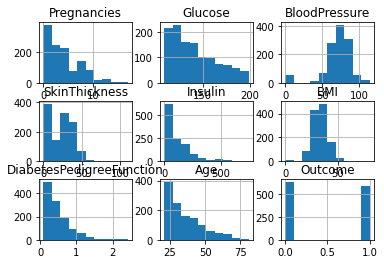

In [60]:
clean_data.hist()

In [61]:
#visualisation
clean_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0


In [62]:
clean_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1989,4,110,66,0,0,31.9,0.471,29,0
1990,3,111,90,12,78,28.4,0.495,29,0
1992,6,134,70,23,130,35.4,0.542,29,1
1996,8,179,72,42,130,32.7,0.719,36,1
1998,0,129,110,46,130,67.1,0.319,26,1


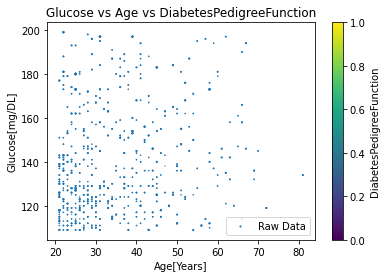

In [63]:
import matplotlib.pyplot as plt
age = clean_data['Age']
glucose = clean_data['Glucose']
pedi = clean_data['DiabetesPedigreeFunction']
plt.scatter(age, glucose, pedi, cmap = "bwr_r", label = "Raw Data")
plt.colorbar(orientation = "vertical", label = "DiabetesPedigreeFunction")
plt.title('Glucose vs Age vs DiabetesPedigreeFunction')
plt.xlabel('Age[Years]')
plt.ylabel('Glucose[mg/DL]')
plt.legend()

In [17]:
#modelling and training

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=2)

In [94]:
regr = LinearRegression()

In [95]:
regr.fit(X_train, y_train)

LinearRegression()

In [96]:
print(regr.coef_)
np.mean((regr.predict(X_test)- y_test)**2)

[ 1.09690113e-15  1.00000000e+00 -2.77555756e-16 -5.55111512e-17
 -1.11022302e-16 -1.23490627e-16 -4.89192020e-16]


7.937467736703968e-28

In [97]:
pred = regr.predict(X_test)

In [98]:
pred

array([1.14000000e+02, 9.90000000e+01, 8.30000000e+01, 1.10000000e+02,
       1.37000000e+02, 1.33000000e+02, 9.40000000e+01, 1.99000000e+02,
       1.46000000e+02, 1.58000000e+02, 1.31000000e+02, 7.19118414e-14,
       1.73000000e+02, 1.22000000e+02, 1.08000000e+02, 1.63000000e+02,
       1.30000000e+02, 1.47000000e+02, 1.58000000e+02, 1.09000000e+02,
       8.70000000e+01, 1.04000000e+02, 8.00000000e+01, 8.90000000e+01,
       6.62368968e-14, 1.26000000e+02, 1.45000000e+02, 1.23000000e+02,
       6.80000000e+01, 9.60000000e+01, 1.13000000e+02, 1.27000000e+02,
       1.06000000e+02, 1.61000000e+02, 1.62000000e+02, 9.10000000e+01,
       9.30000000e+01, 9.40000000e+01, 1.70000000e+02, 1.81000000e+02,
       1.44000000e+02, 8.30000000e+01, 1.32000000e+02, 8.10000000e+01,
       1.56000000e+02, 1.89000000e+02, 1.25000000e+02, 9.00000000e+01,
       1.29000000e+02, 1.36000000e+02, 9.60000000e+01, 1.26000000e+02,
       1.18000000e+02, 1.39000000e+02, 8.40000000e+01, 1.00000000e+02,
      

In [100]:
#Variance score: 1 = perfect prediction, 0 = no linear relationship between x and y
regr.score(X_test, y_test)

1.0